In [2]:
import numpy as np
from astropy.modeling import models,fitting
%matplotlib inline
#pymodelfit py3 is not supported yet

In [2]:
g=models.Gaussian1D(amplitude=1.2,mean=0.9,stddev=0.5)

In [3]:
g

<Gaussian1D(amplitude=1.2, mean=0.9, stddev=0.5)>

In [4]:
print(g)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude mean stddev
    --------- ---- ------
          1.2  0.9    0.5


In [6]:
import matplotlib.pyplot as plt


x=np.linspace(0.4,1.4,10)
y=g(x)
plt.scatter(x,y,marker='o')
plt.show()

NameError: name 'g' is not defined

In [27]:
np.random.seed(0)
x=np.linspace(-5,5,100)
y=3*np.exp(-0.5*(x-1.2)**2/0.8**2)
y+=np.random.normal(0,0.5,x.shape)


t_init=models.Trapezoid1D(amplitude=1,x_0=0,width=1,slope=0.5)
fit_t=fitting.LevMarLSQFitter()
t=fit_t(t_init,x,y)


g_init=models.Gaussian1D(amplitude=1,mean=0,stddev=1)
fit_g=fitting.LevMarLSQFitter()
g=fit_g(g_init,x,y)


plt.figure(figsize=(16,9))
plt.plot(x,y,'ko')
plt.plot(x,t(x),'b-',label="Trapezoid")
plt.plot(x,g(x),'r*',label="Gaussian")

plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc='best')

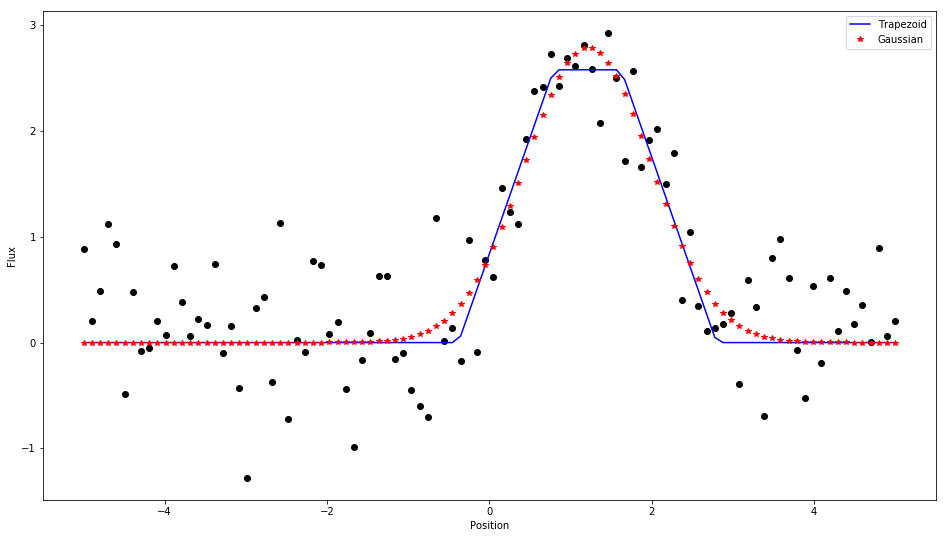

In [28]:
plt.show()

In [32]:
t

<Trapezoid1D(amplitude=2.5790961624831814, x_0=1.2088858746761117, width=0.831424367828703, slope=2.194708618603317)>

In [33]:
g

<Gaussian1D(amplitude=2.787241542365177, mean=1.215510574986084, stddev=0.7764009049976157)>

In [44]:
import warnings

np.random.seed(0)
y,x=np.mgrid[:128,:128]
z=2.*x**2-0.5*x**2+1.5*x*y-1
z+=np.random.normal(0,0.1,z.shape)*50000

p_init=models.Polynomial2D(degree=2)
fit_p=fitting.LevMarLSQFitter()




with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter 
    warnings.simplefilter( 'ignore')
    p = fit_p(p_init, x, y, z)
    
# Plot the data with the best-fit model
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.imshow(z, origin= 'lower', interpolation= 'nearest' , vmin=-1e4, vmax=5e4)
plt.title("Data")
plt.subplot(1,3,2)
plt.imshow(p(x, y), origin= 'lower' , interpolation= 'nearest', vmin=-1e4, vmax=5e4)
plt.title("Model")
plt.subplot(1,3,3)
plt.imshow(z - p(x, y), origin= 'lower' , interpolation= 'nearest' , vmin=-1e4,vmax=5e4)
plt.title("Residual")

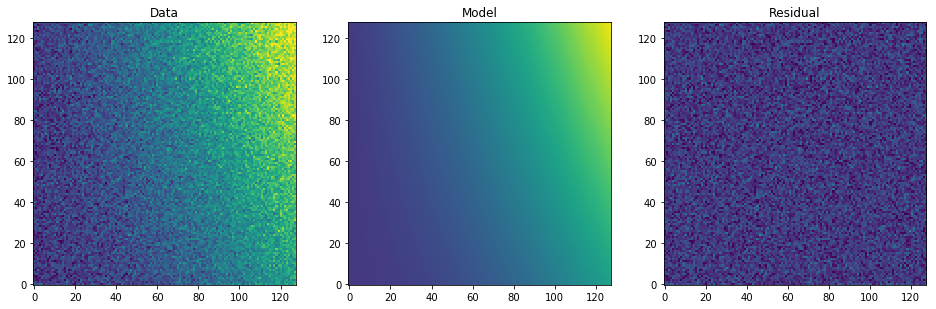

In [45]:
plt.show()

In [146]:
import numpy as np
from astropy.modeling import models, fitting

# Generate fake data
np.random.seed(42)
g1 = models.Gaussian1D(1, 0, 0.2)
g2 = models.Gaussian1D(2.5, 0.5, 0.1)
x = np.linspace(-1, 1, 200)
y = g1(x) + g2(x) + np.random.normal(0., 0.5, x.shape)

# Now to fit the data create a new superposition with initial
# guesses for the parameters:
gg_init = models.Gaussian1D(1, 0, 0.1) + models.Gaussian1D(1, 0., 0.1)
fitter = fitting.SLSQPLSQFitter()
gg_fit = fitter(gg_init, x, y)

g_init=models.Gaussian1D(amplitude=2.5,mean=0.5,stddev=0.1)
fit_g=fitting.LevMarLSQFitter()
g=fit_g(g_init,x,y)

# Plot the data with the best-fit model
plt.figure(figsize=(8,6))
plt.plot(x, y,  'ko' )
plt.plot(x, g(x),  'r-' , lw=2)
plt.plot(x,gg_fit(x),'y*',lw=2)
plt.xlabel( 'Position' )
plt.ylabel( 'Flux' )


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 42.7164532195
            Iterations: 31
            Function evaluations: 272
            Gradient evaluations: 31


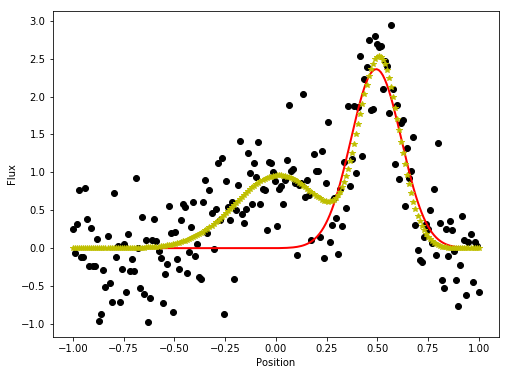

In [147]:
plt.show()

In [76]:
gg_fit

<CompoundModel11(amplitude_0=2.466001090714471, mean_0=0.5101462235194474, stddev_0=0.10033375467865903, amplitude_1=0.9600227310602417, mean_1=0.014778368307745746, stddev_1=0.21615047300898657)>

In [77]:
g

<Gaussian1D(amplitude=2.3608468954014166, mean=0.49471028844693216, stddev=0.12460065651357898)>

In [91]:
from astropy.modeling.models import Gaussian1D, Polynomial1D
x=np.arange(1,10,1)
p1=Polynomial1D(degree=1,n_models=5)
p1.c1=[0,1,2,3,4]


In [92]:
p1

<Polynomial1D(1, c0=[ 0., 0., 0., 0., 0.], c1=[ 0., 1., 2., 3., 4.], n_models=5)>

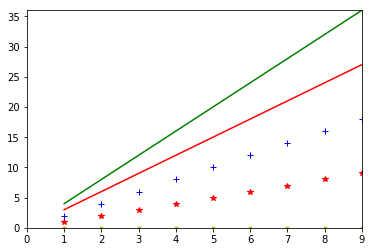

In [102]:
y=p1(x,model_set_axis=False)
plt.xlim(0,9)
plt.ylim(0,36)
plt.plot(x,y[0],'y.')
plt.plot(x,y[1],'r*')
plt.plot(x,y[2],'b+')
plt.plot(x,y[3],'r')
plt.plot(x,y[4],'g')
plt.show()

In [103]:
y.shape,x.shape

((5, 9), (9,))

In [96]:
x,y

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
        [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.],
        [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.],
        [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.]]))

In [104]:
models.Gaussian1D.param_names

('amplitude', 'mean', 'stddev')

In [106]:
models.Polynomial1D.degree?

In [108]:
ch2=models.Chebyshev2D(x_degree=2,y_degree=3)
coeffs=dict((name,[idx,idx+10]) for idx,name in enumerate(ch2.param_names))


In [109]:
ch2

<Chebyshev2D(2, 3, c0_0=0.0, c1_0=0.0, c2_0=0.0, c0_1=0.0, c1_1=0.0, c2_1=0.0, c0_2=0.0, c1_2=0.0, c2_2=0.0, c0_3=0.0, c1_3=0.0, c2_3=0.0)>

In [110]:
ch2=models.Chebyshev2D(x_degree=2,y_degree=3,n_models=2,**coeffs)
ch2.param_sets

array([[  0.,  10.],
       [  1.,  11.],
       [  2.,  12.],
       [  3.,  13.],
       [  4.,  14.],
       [  5.,  15.],
       [  6.,  16.],
       [  7.,  17.],
       [  8.,  18.],
       [  9.,  19.],
       [ 10.,  20.],
       [ 11.,  21.]])

In [111]:
coeffs

{'c0_0': [0, 10],
 'c0_1': [3, 13],
 'c0_2': [6, 16],
 'c0_3': [9, 19],
 'c1_0': [1, 11],
 'c1_1': [4, 14],
 'c1_2': [7, 17],
 'c1_3': [10, 20],
 'c2_0': [2, 12],
 'c2_1': [5, 15],
 'c2_2': [8, 18],
 'c2_3': [11, 21]}

In [112]:
for idx,name in enumerate(ch2.param_names):
    print(idx,name)
    

0 c0_0
1 c1_0
2 c2_0
3 c0_1
4 c1_1
5 c2_1
6 c0_2
7 c1_2
8 c2_2
9 c0_3
10 c1_3
11 c2_3


In [113]:
c2=np.array([[1,2],[2,3]])
c1=np.array([2,3])

In [132]:
p1=models.Polynomial1D(3)
p1.c0=1
p1.c1=2
x=np.arange(10)
y=p1(x)+np.random.rand(x.size)*0.01
p2=models.Polynomial1D(3)
pfit=fitting.LinearLSQFitter()
new_model=pfit(p2,x,y)


In [133]:
print(new_model)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
          c0           c1              c2                c3       
    ------------- ------------ ----------------- -----------------
    1.00650229478 1.9984520194 0.000149686911847 4.44952801114e-06


In [144]:
TwoGaussians=Gaussian1D+Gaussian1D

In [145]:
TwoGaussians

<class '__main__.CompoundModel17'>
Name: CompoundModel17
Inputs: ('x',)
Outputs: ('y',)
Fittable parameters: ('amplitude_0', 'mean_0', 'stddev_0', 'amplitude_1', 'mean_1', 'stddev_1')
Expression: [0] + [1]
Components: 
    [0]: <class 'astropy.modeling.functional_models.Gaussian1D'>
    Name: Gaussian1D
    Inputs: ('x',)
    Outputs: ('y',)
    Fittable parameters: ('amplitude', 'mean', 'stddev')

    [1]: <class 'astropy.modeling.functional_models.Gaussian1D'>
    Name: Gaussian1D
    Inputs: ('x',)
    Outputs: ('y',)
    Fittable parameters: ('amplitude', 'mean', 'stddev')

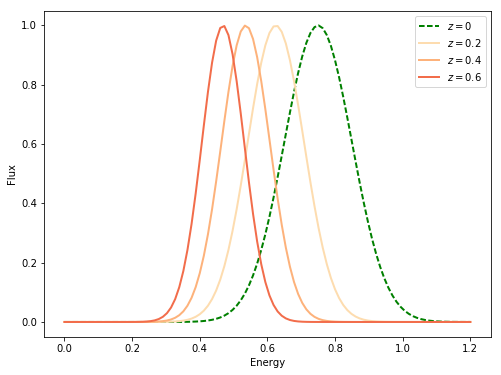

In [148]:
from astropy.modeling.models import Linear1D,Sine1D
import numpy as np
from astropy.modeling.models import Redshift, Gaussian1D
class RedshiftedGaussian(Redshift | Gaussian1D(1, 0.75, 0.1)):
    """Evaluates a Gaussian with optional redshift applied to the input."""
x = np.linspace(0, 1.2, 100)
g0 = RedshiftedGaussian(z_0=0)
plt.figure(figsize=(8, 6))
plt.plot(x, g0(x),  'g--' , lw=2, label= '$z=0$' )

for z in (0.2, 0.4, 0.6):
    g = RedshiftedGaussian(z_0=z)
    plt.plot(x, g(x), color=plt.cm.OrRd(z), lw=2,
             label= '$z={0}$'.format(z))
plt.xlabel( 'Energy' )
plt.ylabel('Flux')
plt.legend()
plt.show()

In [159]:
redshift=models.Redshift(0.1)
for i in np.arange(1,10):
    print(redshift(i))

1.1
2.2
3.3000000000000003
4.4
5.5
6.6000000000000005
7.700000000000001
8.8
9.9


In [156]:
Redshift

<class 'astropy.modeling.functional_models.Redshift'>
Name: Redshift (RedshiftScaleFactor)
Inputs: ('x',)
Outputs: ('y',)
Fittable parameters: ('z',)

In [166]:
import numpy as np
from astropy.modeling.models import Rotation2D, Gaussian2D
class RotatedGaussian(Rotation2D | Gaussian2D(1, 0, 0, 0.1, 0.3)):
        """A Gaussian2D composed with a coordinate rotation."""
x, y = np.mgrid[-1:1:0.01, -1:1:0.01]
plt.figure(figsize=(8, 4))
for idx, theta in enumerate((0, 45, 90,135)): 
    g = RotatedGaussian(theta) 
    plt.subplot(1, 4, idx + 1) 
    plt.imshow(g(x, y), origin= 'lower' ) 
    plt.xticks([])
    plt.yticks([])
    plt.title( 'Rotated $ {0}^\circ $'.format(theta))

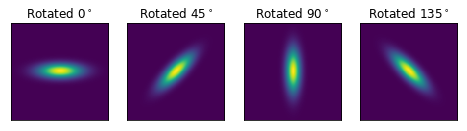

In [167]:
plt.show()

In [169]:
Gaussian2D,Rotation2D

(<class 'astropy.modeling.functional_models.Gaussian2D'>
Name: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Fittable parameters: ('amplitude', 'x_mean', 'y_mean', 'x_stddev', 'y_stddev', 'theta'),
 <class 'astropy.modeling.rotations.Rotation2D'>
Name: Rotation2D
Inputs: ('x', 'y')
Outputs: ('x', 'y')
Fittable parameters: ('angle',))

In [170]:
from astropy.modeling.models import Mapping
m=Mapping((1,0,2))
m(1,2,3)

(2.0, 1.0, 3.0)

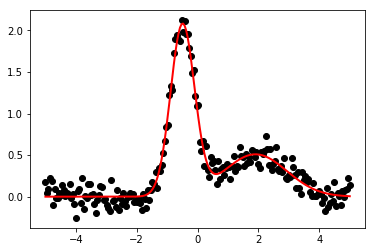

In [17]:
import numpy as np
from astropy.modeling.models import custom_model 
from astropy.modeling.fitting import LevMarLSQFitter



# Define model
@custom_model
def sum_of_gaussians(x, amplitude1=1., mean1=-1., sigma1=1., amplitude2=1., mean2=1., sigma2=1.):
    return (amplitude1 * np.exp(-0.5 * ((x - mean1) / sigma1)**2) + amplitude2 * np.exp(-0.5 * ((x - mean2) / sigma2)**2))

# Generate fake data
np.random.seed(0)
x = np.linspace(-5., 5., 200)
m_ref = sum_of_gaussians(amplitude1=2., mean1=-0.5, sigma1=0.4,
                         amplitude2=0.5, mean2=2., sigma2=1.0)
y = m_ref(x) + np.random.normal(0., 0.1, x.shape)
# Fit model to data
m_init = sum_of_gaussians()
fit = LevMarLSQFitter()
m = fit(m_init, x, y)
# Plot the data and the best fit
plt.plot(x, y,  'o' , color= 'k' )
plt.plot(x, m(x), color= 'r' , lw=2)
plt.show()

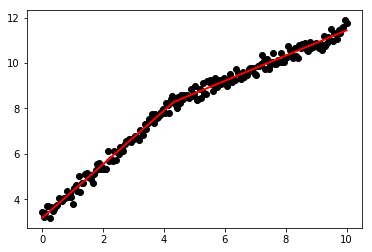

In [7]:
#sgn = lambda x: 1 if x > 0 else -1 if x < 0 else 0
# Define model
@custom_model
def sum_of_linear(x,a=1,b=8,x0=3,y0=5):
#    if x.all() < x0:
    return np.where(x<x0,a*(x-x0)+y0,b*(x-x0)+y0)




# Generate fake data
np.random.seed(0)
x = np.linspace(0., 10., 200)
m_ref= sum_of_linear(a=1.23,b=0.58,x0=4,y0=8)
y = m_ref(x) + np.random.normal(0., 0.2, x.shape)
# Fit model to data

m_init = sum_of_linear()
#fit = fitting.LinearLSQFitter()
fit=fitting.LevMarLSQFitter()
m = fit(m_init, x, y)
# Plot the data and the best fit
plt.plot(x, y,  'o' , color= 'k' )
plt.plot(x, m(x), color= 'r' , lw=2)
plt.show()

In [ ]:
m

In [254]:
m

<sum_of_linear(a=1.1810844586061247, b=0.5561372665921388, x0=4.319574724056403, y0=8.278725196123963)>

In [235]:
np.where?

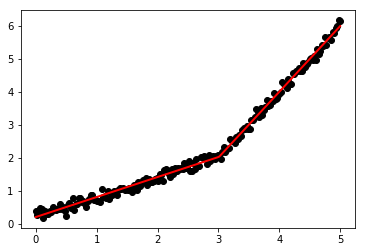

In [16]:
import numpy as np
from astropy.modeling.models import custom_model 
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling import models,fitting

@custom_model
def bisignlinear(x,a=1,b=0.5,x0=3,y0=5):
    return a*(np.sign(x-x0)+1)/2*(x-x0)+b*(1-np.sign(x-x0))/2*(x-x0)+y0   

np.random.seed(0)
x = np.linspace(0., 5., 200)
m_ref= bisignlinear(a=2,b=0.6,x0=3,y0=2)
y = m_ref(x) + np.random.normal(0., 0.1, x.shape)
# Fit model to data
m_init = bisignlinear(a=1,b=0.1,x0=3,y0=5)
#fit = fitting.LinearLSQFitter()
fit=fitting.LevMarLSQFitter()
m = fit(m_init, x, y)
# Plot the data and the best fit
plt.plot(x, y,  'o' , color= 'k' )
plt.plot(x, m(x), color= 'r' , lw=2)
plt.show()    

In [15]:
m

<bisignlinear(a=4.992326903020648, b=4.0062939412122125, x0=3.018073862599352, y0=2.0953899397751816)>

In [255]:
1147+227+75

1449

In [256]:
1147+227+75+769+35

2253

In [259]:
1-1449/2253

0.3568575233022636

In [258]:
769+53

822

In [261]:
(757+35)/(757+35+1140+218+73)

0.3562753036437247

In [262]:
757+35

792

In [263]:
(15+17+19+7+14+12)/(30+31+30+28+31+30)

0.4666666666666667

In [264]:
(15+17+19)/(30+31+30)

0.5604395604395604

In [265]:
(7+14+12)/(28+31+30)

0.3707865168539326

In [269]:
10/26

0.38461538461538464

In [270]:
10/31

0.3225806451612903